# Multi-Class Prediction of Obesity Risk

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing the data

In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

# Analyzing the data

In [3]:
print(train_data.describe())

                id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.

In [4]:
print(test_data.describe())

                 id           Age        Height        Weight          FCVC  \
count  13840.000000  13840.000000  13840.000000  13840.000000  13840.000000   
mean   27677.500000     23.952740      1.698934     87.384504      2.442898   
std     3995.408198      5.799814      0.088761     26.111819      0.531606   
min    20758.000000     14.000000      1.450000     39.000000      1.000000   
25%    24217.750000     20.000000      1.631662     65.000000      2.000000   
50%    27677.500000     22.906342      1.700000     83.952968      2.358087   
75%    31137.250000     26.000000      1.760710    111.157811      3.000000   
max    34597.000000     61.000000      1.980000    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  13840.000000  13840.000000  13840.000000  13840.000000  
mean       2.750610      2.032044      0.974532      0.611033  
std        0.710927      0.611230      0.840361      0.608005  
min        1.000000      1.00000

In [5]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [7]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        print(col, train_data[col].unique())

Gender ['Male' 'Female']
family_history_with_overweight ['yes' 'no']
FAVC ['yes' 'no']
CAEC ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE ['no' 'yes']
SCC ['no' 'yes']
CALC ['Sometimes' 'no' 'Frequently']
MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


The columns 'Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC' contain binary values.

The columns 'CALC', 'MTRANS', 'CAEC', 'NObeyesdad' contain categorical values. We are excluding 'NObeyesdad' from the list as it is the target variable.

In [8]:
binary_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

categorical_features = ['CAEC', 'CALC', 'MTRANS']

In [9]:
for col in train_data.columns:
    if col in categorical_features and col != 'NObeyesdad':
        print(col, train_data[col].unique(), test_data[col].unique())

print('NObeyesdad', train_data['NObeyesdad'].unique())

CAEC ['Sometimes' 'Frequently' 'no' 'Always'] ['Sometimes' 'Always' 'Frequently' 'no']
CALC ['Sometimes' 'no' 'Frequently'] ['Sometimes' 'no' 'Frequently' 'Always']
MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike'] ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']
NObeyesdad ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


The values for CAEC and CALC are: 'no', 'Sometimes', 'Frequently', 'Always'.

The values for MTRANS are: 'Public_Transportation', 'Automobile', 'Motorbike', 'Bike', 'Walking'.

The values for NObeyesdad are: 'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'.

# Data Preprocessing

In [10]:
binary_encoder = OrdinalEncoder(
    categories=[
        ['Female', 'Male'],
        ['no', 'yes'],
        ['no', 'yes'],
        ['no', 'yes'],
        ['no', 'yes']
    ]
)

train_data[binary_features] = binary_encoder.fit_transform(train_data[binary_features])
test_data[binary_features] = binary_encoder.transform(test_data[binary_features])

categorical_encoder = OrdinalEncoder(
    categories=[
        ['no', 'Sometimes', 'Frequently', 'Always'],
        ['no', 'Sometimes', 'Frequently', 'Always'],
        ['Public_Transportation', 'Automobile', 'Motorbike', 'Bike', 'Walking']
    ]
)

train_data[categorical_features] = categorical_encoder.fit_transform(train_data[categorical_features])
test_data[categorical_features] = categorical_encoder.transform(test_data[categorical_features])

# Data visualization

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'family_history_with_overweight'}>,
        <Axes: title={'center': 'FAVC'}>,
        <Axes: title={'center': 'FCVC'}>],
       [<Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CAEC'}>,
        <Axes: title={'center': 'SMOKE'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'SCC'}>, <Axes: title={'center': 'FAF'}>,
        <Axes: title={'center': 'TUE'}>,
        <Axes: title={'center': 'CALC'}>],
       [<Axes: title={'center': 'MTRANS'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

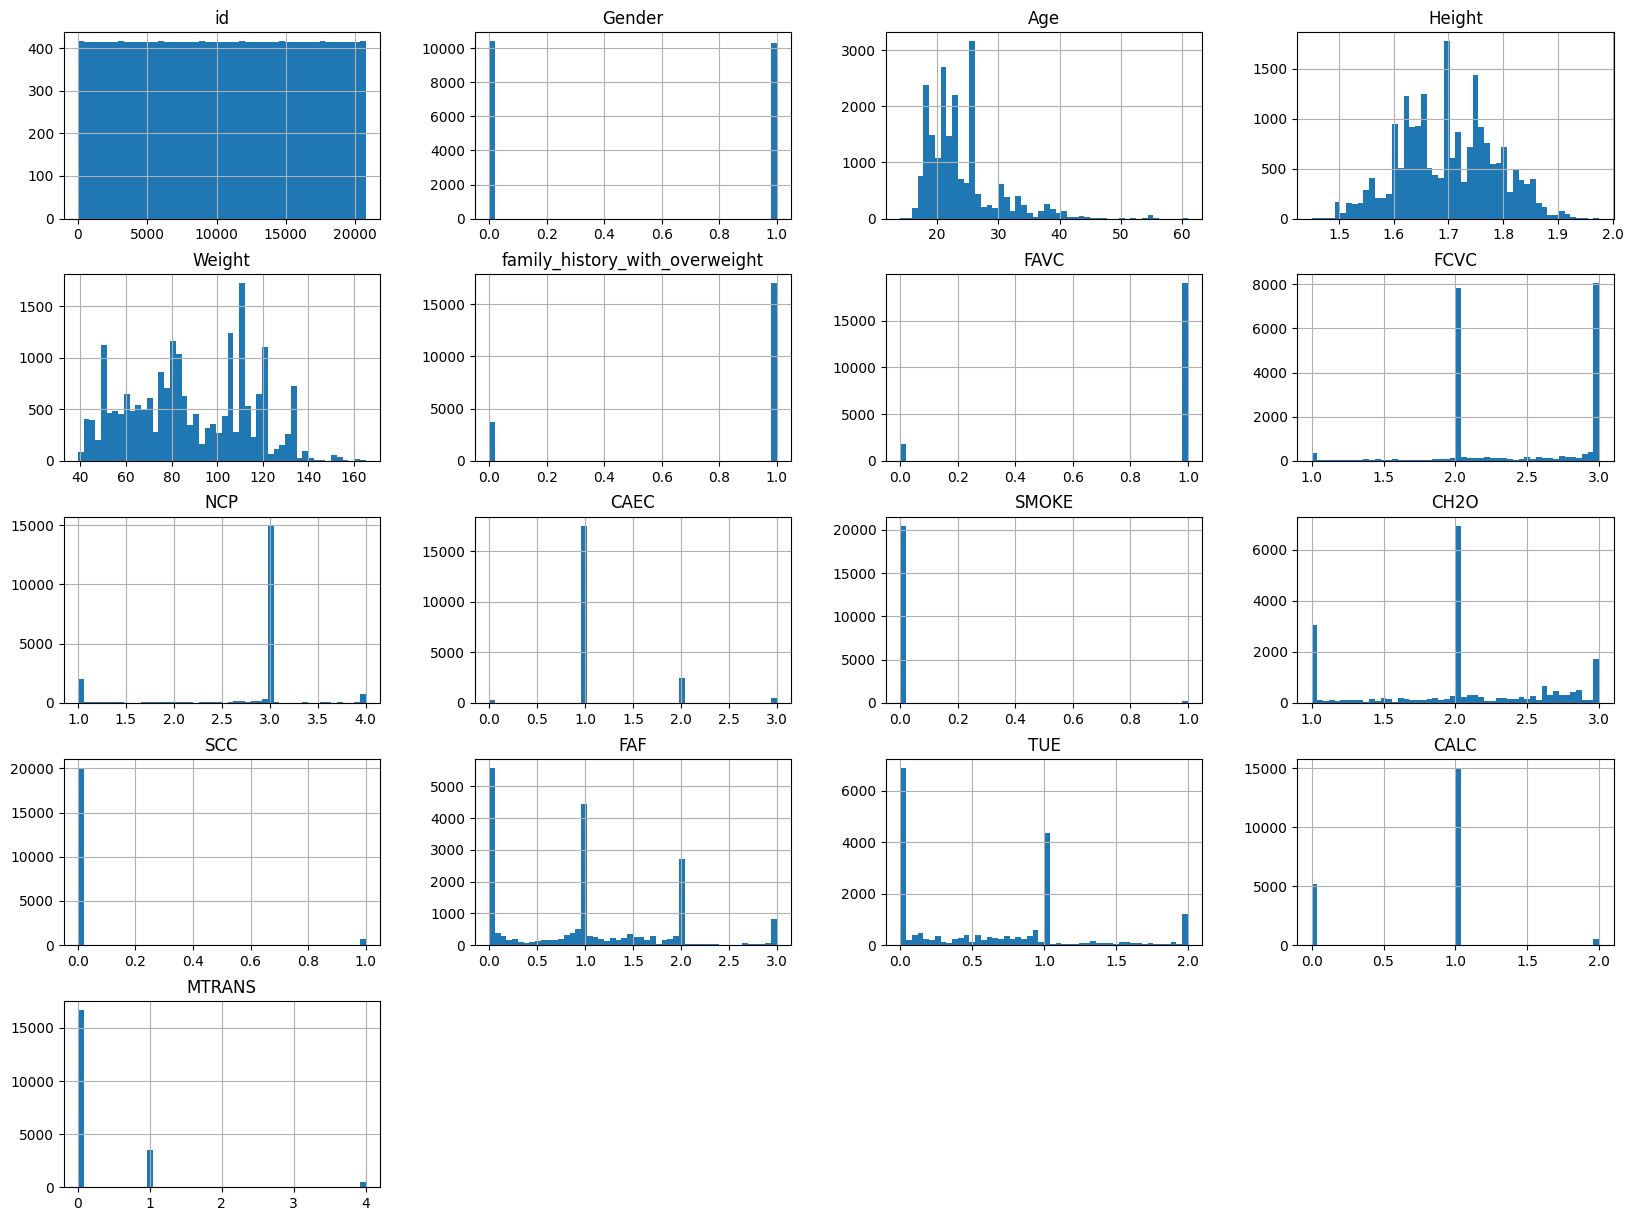

In [11]:
train_data.hist(bins=50, figsize=(20, 15))

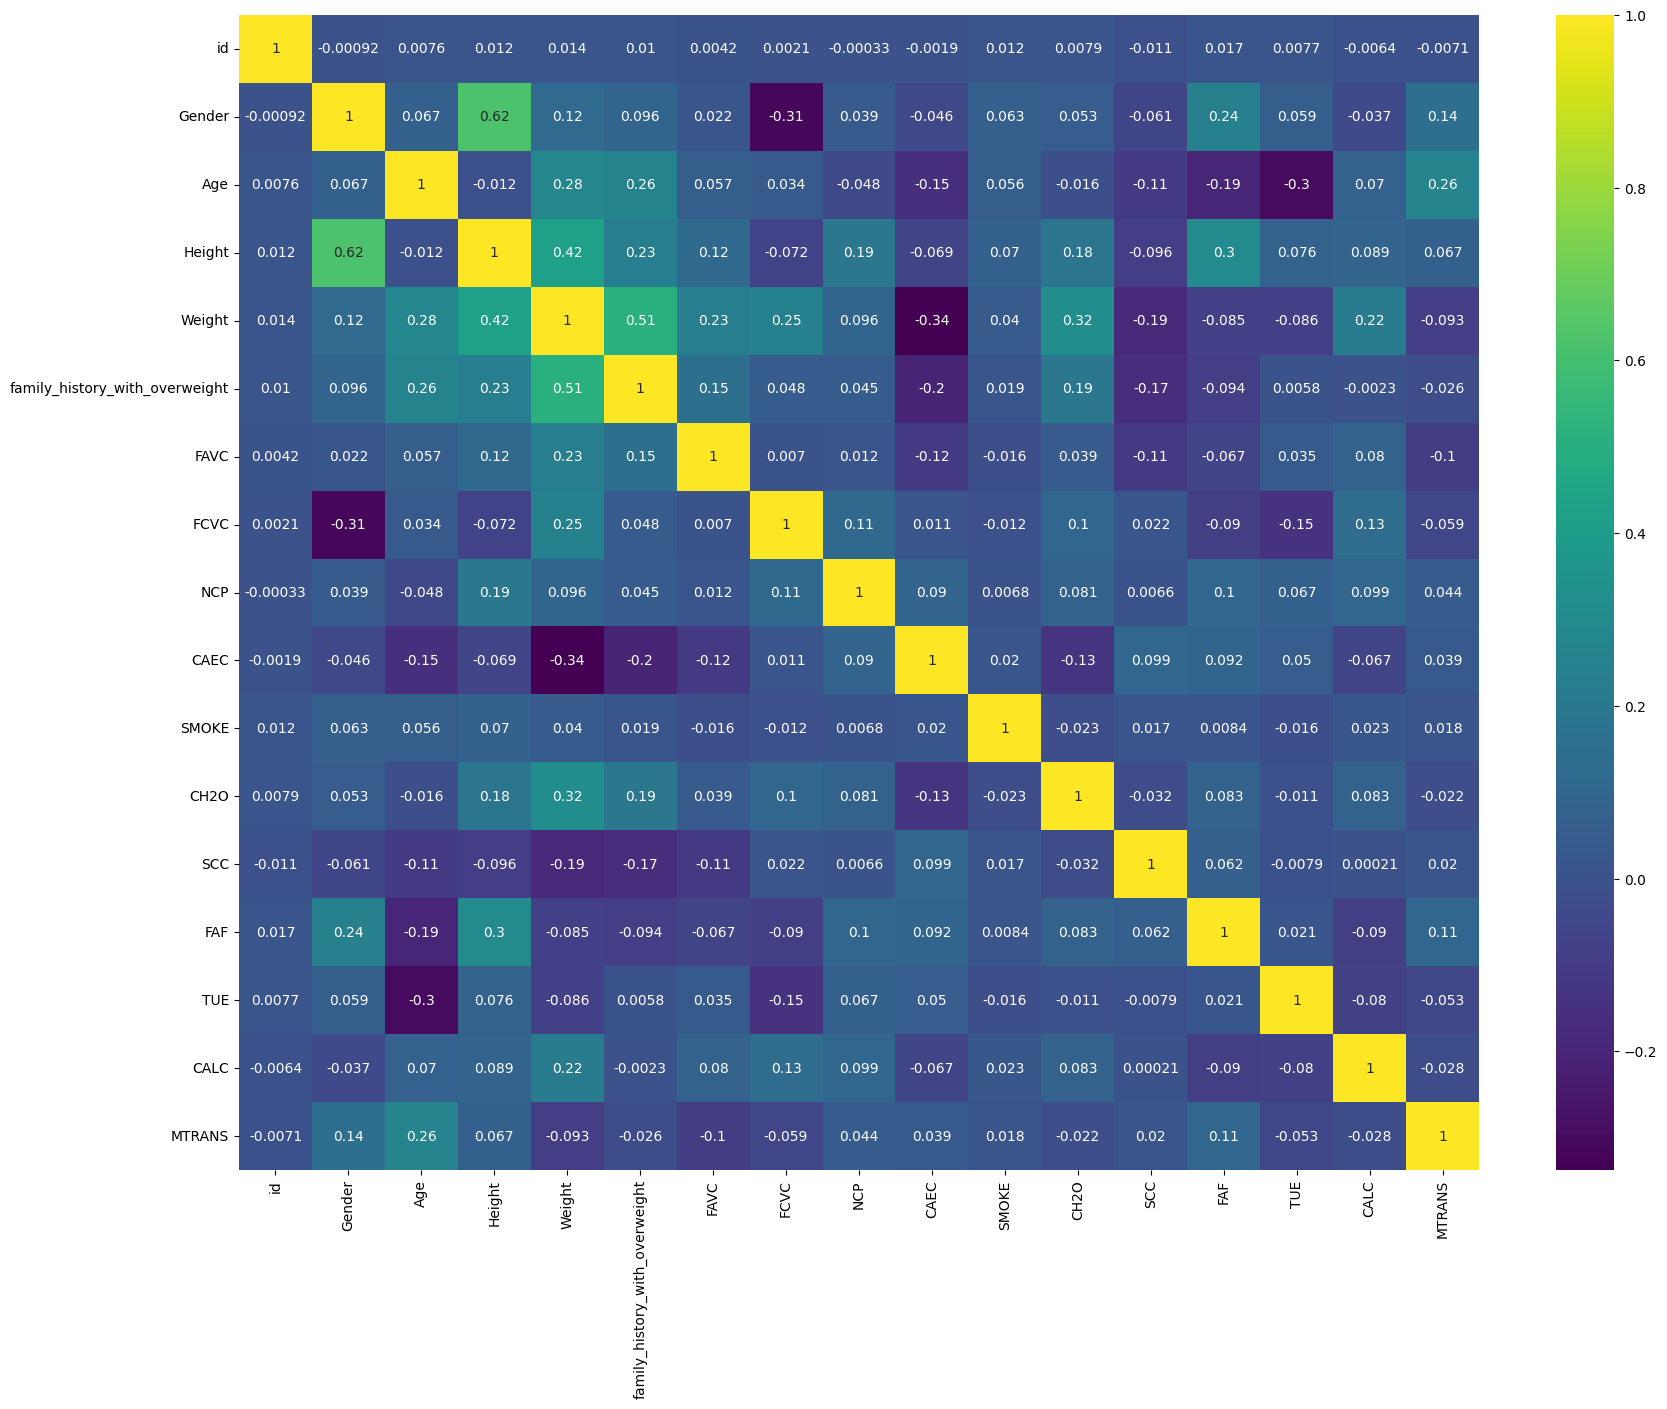

In [12]:
corr = train_data.corr(numeric_only = True)

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

In [13]:
encoder = OrdinalEncoder(
    categories = [
        [
            'Insufficient_Weight',
            'Normal_Weight',
            'Overweight_Level_I',
            'Overweight_Level_II',
            'Obesity_Type_I',
            'Obesity_Type_II',
            'Obesity_Type_III'
        ]
    ]
)

correlation_data = train_data.copy()

correlation_data['NObeyesdad'] = pd.DataFrame(encoder.fit_transform(correlation_data[['NObeyesdad']]))

corr_matrix = correlation_data.corr(numeric_only = False)['NObeyesdad']

print(corr_matrix.abs().sort_values(ascending=False))

NObeyesdad                        1.000000
Weight                            0.921250
family_history_with_overweight    0.522026
CAEC                              0.364052
Age                               0.356211
CH2O                              0.273154
FCVC                              0.272933
FAF                               0.234745
FAVC                              0.215401
CALC                              0.189361
SCC                               0.184959
Height                            0.150141
TUE                               0.121009
MTRANS                            0.117953
Gender                            0.067699
NCP                               0.027227
id                                0.016240
SMOKE                             0.013501
Name: NObeyesdad, dtype: float64


Excluding weight, the top 3 features that have the most impact on the target variable are: 'family_history_with_overweight', 'CAEC' and 'Age'.

## Family history with overweight

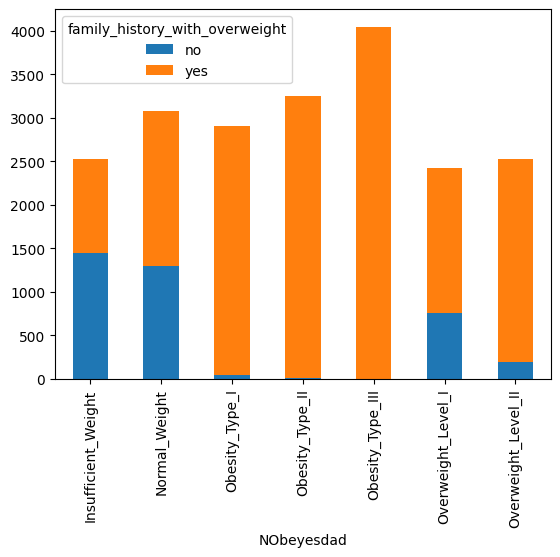

In [14]:
family_df = train_data.groupby('NObeyesdad')['family_history_with_overweight'].value_counts().unstack()
family_df = family_df.rename(index={0: 'no', 1: 'yes'}, columns={0: 'no', 1: 'yes'})

family_df.plot(kind='bar', stacked=True)
plt.show()


We can see that most of the people with obesity and overweight have a family history of overweight.

## CAEC, or "Consumption of food between meals"

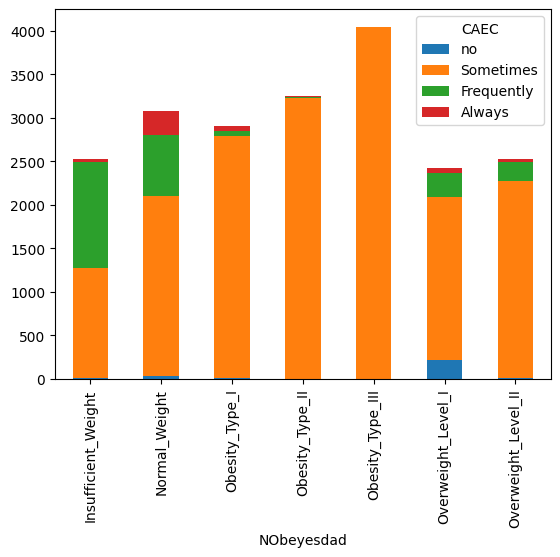

In [15]:
caec_df = train_data.groupby('NObeyesdad')['CAEC'].value_counts().unstack()
caec_df = caec_df.rename(index={0: 'no', 1: 'Sometimes', 2: 'Frequently', 3: 'Always'}, columns={0: 'no', 1: 'Sometimes', 2: 'Frequently', 3: 'Always'})

caec_df.plot(kind='bar', stacked=True)
plt.show()

Although most people's consumption of food between meals vary a lot, we can see that most people with obesity and overweight consume food between meals 'Sometimes'.

## Age

<Axes: >

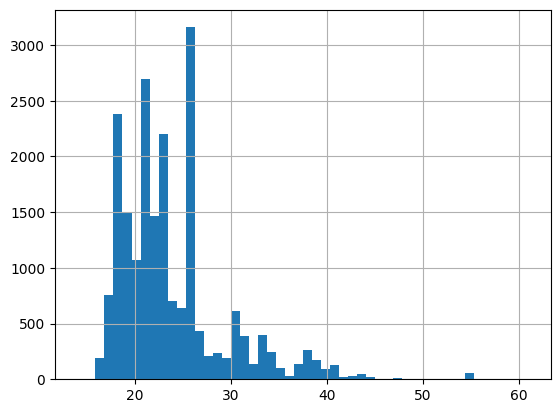

In [16]:
train_data['Age'].hist(bins=50)

<Axes: xlabel='NObeyesdad', ylabel='Age'>

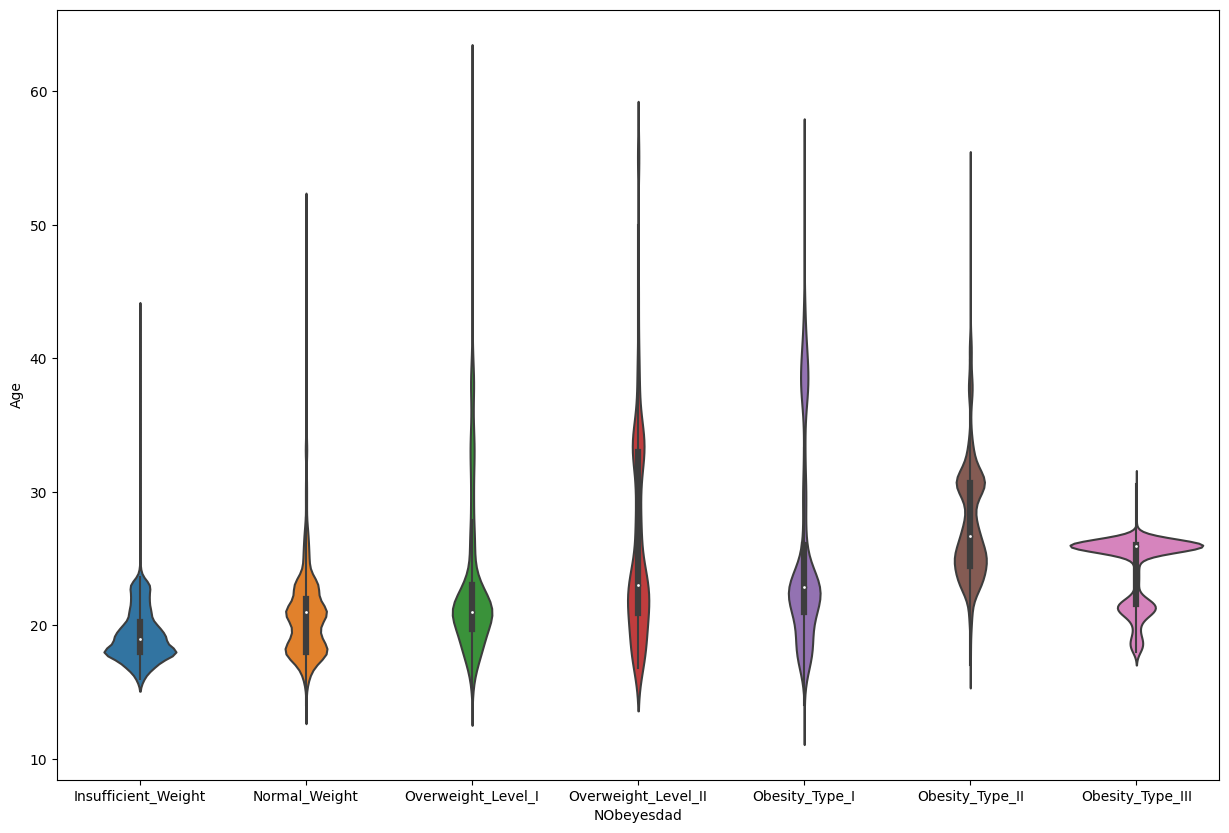

In [17]:
plt.figure(figsize=(15, 10))
sns.violinplot(
    x='NObeyesdad',
    y='Age',
    data=train_data,
    order=[
        'Insufficient_Weight',
        'Normal_Weight',
        'Overweight_Level_I',
        'Overweight_Level_II',
        'Obesity_Type_I',
        'Obesity_Type_II',
        'Obesity_Type_III'
    ]
)

# Feature Engineering

We will add a new feature 'BMI' in order to better predict the target variable.

In [18]:
train_data['BMI'] = train_data['Weight'] / (train_data['Height'] ** 2)
test_data['BMI'] = test_data['Weight'] / (test_data['Height'] ** 2)

A quick glance:

In [19]:
train_data['BMI'].describe()

count    20758.000000
mean        30.241842
std          8.333932
min         12.868541
25%         24.088223
50%         29.384757
75%         37.011168
max         54.997991
Name: BMI, dtype: float64

In [20]:
test_data['BMI'].describe()

count    13840.000000
mean        30.122959
std          8.273030
min         12.812830
25%         23.875115
50%         29.384757
75%         36.727290
max         51.227736
Name: BMI, dtype: float64

# Model Selection and Training 

We will start with Naive Bayes as it is a simple model and can be used as a baseline. We will then try other models like Random Forest hoping to achieve better results.

In [21]:
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('NObeyesdad', axis=1), train_data['NObeyesdad'], test_size=0.2, random_state=42)

## Naive Bayes

In [22]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.8167148362235067
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.92      0.87       524
      Normal_Weight       0.84      0.70      0.77       626
     Obesity_Type_I       0.72      0.72      0.72       543
    Obesity_Type_II       0.88      0.93      0.90       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.69      0.63      0.66       484
Overweight_Level_II       0.65      0.69      0.67       514

           accuracy                           0.82      4152
          macro avg       0.80      0.80      0.80      4152
       weighted avg       0.82      0.82      0.82      4152

Confusion Matrix:
[[484  38   0   0   0   1   1]
 [102 441   0   0   0  77   6]
 [  2   0 390  82   3  10  56]
 [  0   0  42 612   1   0   2]
 [  0   0   0   1 802   1   0]
 [  3  36  13   0   0 307 125]
 [  0  11  97   2   0  49 355]]


In [23]:
test_predictions = nb_model.predict(test_data)

predictions_df = pd.DataFrame({'id': test_data['id'], 'NObeyesdad': test_predictions})

predictions_df.to_csv('predictions_nb.csv', index=False)

The resulting .csv file was uploaded to kaggle and got a 0.79263 score.

## Random forest

In [24]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.8986030828516378
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.93      0.93       524
      Normal_Weight       0.87      0.88      0.87       626
     Obesity_Type_I       0.88      0.87      0.88       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.76      0.77      0.77       484
Overweight_Level_II       0.79      0.78      0.79       514

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152

Confusion Matrix:
[[489  32   0   0   0   2   1]
 [ 30 549   0   0   0  43   4]
 [  2   1 475  14   1  11  39]
 [  0   0  16 639   1   0   1]
 [  0   0   1   1 802   0   0]
 [  1  41   9   0   0 374  59]
 [  0   8  39   5   0  59 403]]


In [25]:
test_predictions = rf_model.predict(test_data)

predictions_df = pd.DataFrame({'id': test_data['id'], 'NObeyesdad': test_predictions})

predictions_df.to_csv('predictions_rf.csv', index=False)

In [26]:
# create the submission .csv
predictions_df.to_csv('submission.csv', index=False)

The resulting .csv file was uploaded to kaggle and got a 0.89812 score.

# Earlier attempts

1 - Before using sklearn's OrdinalEncoder, pandas' get_dummies was used to encode the categorical variables. The resulting .csv file was uploaded to kaggle and got a 0.65823 score using Naive Bayes (GaussianNB) and a 0.88222 score using Random Forest. 

2 - Before adding the 'BMI' feature, the resulting .csv file was uploaded to kaggle and got a 0.70484 score using Naive Bayes and a 0.89441 score using Random Forest (both using OrdinalEncoder, not get_dummies).

Here follows a plot displaying the evolution of the scores as we made changes to the model:

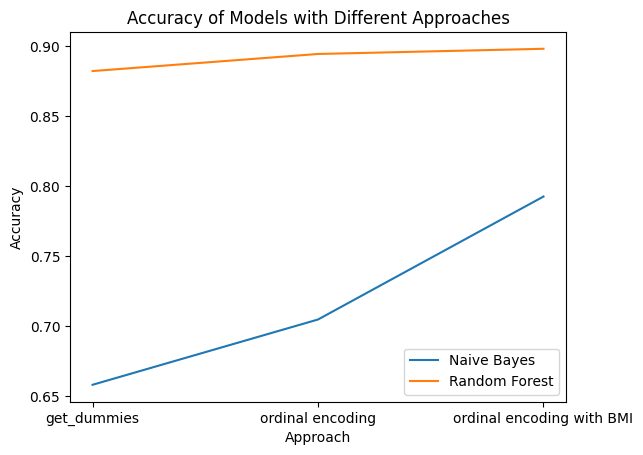

In [27]:
approaches = ['get_dummies', 'ordinal encoding', 'ordinal encoding with BMI']
naive_bayes_scores = [0.65823, 0.70484, 0.79263]
random_forest_scores = [0.88222, 0.89441, 0.89812]

plt.plot(approaches, naive_bayes_scores, label='Naive Bayes')
plt.plot(approaches, random_forest_scores, label='Random Forest')

plt.xlabel('Approach')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models with Different Approaches')
plt.legend()

plt.show()

And now to the code using pandas' get_dummies:

In [28]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [29]:
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

dummy_train_data = pd.get_dummies(train_data, columns=columns)
dummy_test_data = pd.get_dummies(test_data, columns=columns)

dummy_train_data, dummy_test_data = dummy_train_data.align(dummy_test_data, join='outer', axis=1, fill_value=0)

X_train = dummy_train_data.drop('NObeyesdad', axis=1)
y_train = dummy_train_data['NObeyesdad']

X_test = dummy_test_data.drop('NObeyesdad', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [30]:
dummy_nb_model = GaussianNB()
dummy_nb_model.fit(X_train, y_train)

y_pred = dummy_nb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.6567919075144508
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.70      0.80      0.75       524
      Normal_Weight       0.65      0.41      0.51       626
     Obesity_Type_I       0.34      0.66      0.45       543
    Obesity_Type_II       0.78      0.92      0.85       657
   Obesity_Type_III       0.94      1.00      0.97       804
 Overweight_Level_I       0.63      0.31      0.41       484
Overweight_Level_II       0.53      0.26      0.35       514

           accuracy                           0.66      4152
          macro avg       0.65      0.62      0.61      4152
       weighted avg       0.68      0.66      0.64      4152

Confusion Matrix:
[[420  38  58   0   5   1   2]
 [164 259 111   0  19  45  28]
 [  2   3 358 118   7  17  38]
 [  0   0  42 606   0   0   9]
 [  0   0   0   1 801   1   1]
 [ 14  63 202   3  13 148  41]
 [  2  36 270  44   3  24 135]]


In [31]:
test_predictions = dummy_nb_model.predict(dummy_test_data.drop('NObeyesdad', axis=1))

predictions_df = pd.DataFrame({'id': dummy_test_data['id'], 'NObeyesdad': test_predictions})

predictions_df.to_csv('predictions_dummy_nb.csv', index=False)

In [32]:
dummy_rf_model = RandomForestClassifier(random_state=42)
dummy_rf_model.fit(X_train, y_train)

y_pred = dummy_rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.8855973025048169
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.90      0.92       524
      Normal_Weight       0.81      0.88      0.85       626
     Obesity_Type_I       0.87      0.86      0.87       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.75      0.72      0.74       484
Overweight_Level_II       0.77      0.76      0.77       514

           accuracy                           0.89      4152
          macro avg       0.87      0.87      0.87      4152
       weighted avg       0.89      0.89      0.89      4152

Confusion Matrix:
[[473  49   0   0   0   1   1]
 [ 27 553   1   0   0  37   8]
 [  1   3 468  13   1  20  37]
 [  0   0  15 640   0   0   2]
 [  0   0   0   1 802   1   0]
 [  1  59   9   0   0 349  66]
 [  0  18  43   5   0  56 392]]


In [33]:
test_predictions = dummy_rf_model.predict(dummy_test_data.drop('NObeyesdad', axis=1))

predictions_df = pd.DataFrame({'id': dummy_test_data['id'], 'NObeyesdad': test_predictions})

predictions_df.to_csv('predictions_dummy_rf.csv', index=False)
